In [1]:
# Make the imports (data , libraries)
# Preprocess the data 
# Build the model 
    # cost function
    # derivatives of both m and c
    # update m and c for gradient descent 
# Make predictions

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\bhavy\OneDrive\Desktop\SEM 3\MACHINE LEARNING\data set\Real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Data Preprocessing

In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.drop(['No'] , inplace = True , axis = 1)

# Split the Data

In [8]:
train = df.sample(frac = 0.8)
test = df.drop(train.index)

In [9]:
train.shape , test.shape

((331, 7), (83, 7))

In [10]:
X = np.array(train.iloc[:,:6])
Y = np.array(train.iloc[:,6])
x_test = np.array(test.iloc[:,:6])
y_test = np.array(test.iloc[:,6])

In [11]:
X.shape , Y.shape , X.ndim , Y.ndim

((331, 6), (331,), 2, 1)

In [12]:
X[0]

array([2013.333  ,   34.5    ,  324.9419 ,    6.     ,   24.97814,
        121.5417 ])

In [13]:
X = (X-X.mean())/X.std()

In [14]:
X

array([[ 1.59730523, -0.55909292, -0.24258901, -0.59015029, -0.5694692 ,
        -0.46424077],
       [ 1.59739677, -0.59200283, -0.12588239, -0.58906055, -0.56946662,
        -0.46424504],
       [ 1.59657947, -0.56105444, -0.16902773, -0.59015029, -0.56948463,
        -0.4642399 ],
       ...,
       [ 1.59730523, -0.58339395,  0.88549866, -0.59559895, -0.56949764,
        -0.46423345],
       [ 1.59748721, -0.58186832, -0.24898694, -0.59015029, -0.56948357,
        -0.4642396 ],
       [ 1.59694235, -0.59559895, -0.38573341, -0.59015029, -0.56948274,
        -0.46424165]])

In [15]:
X[0].ndim

1

In [19]:
class LinearRegression:
    
    def __init__(self , lr = 0.001 , n_iters = 2000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        

    #Let's define Mean Squared Error
    def mse(self,Y , y_predicted):
        sum_ = 0
        n = len(Y)
        for i in range(n):
            sum_ += (Y[i] - y_predicted[i])**2
        return (1/n)*sum_
    
    #Let's define a function to predict y
        
    def fit(self,X,Y, lr = 0.001 , n_iters = 2000):
        #initiate parameter
        n_samples , n_features = X.shape
        self.weights = np.ones(n_features) #we need 6 weights
        self.bias = 0 # assumed zero
        
        # empty list to store total loss
        self.total_loss = []
        
        for _ in range(self.n_iters):
            # y = wx + b
            y_predicted = np.dot(X , self.weights) + self.bias 
            loss = (y_predicted - Y)/len(Y)
            
            # derivative wrt weights or (slope m)
            # I have omitted the 2 , used np.dot for sum product
            dw = np.dot(X.T , loss)
            
            # derivative wrt bias or (intercept c)
            # I have omitted the 2 again 
            db = np.sum(loss)
            
            # Gradient Descent - iterative process 
            # Let's update the m and c (w and b)
            # m = m - (learning_rate * dm) and similarily for c
#             print(self.weights,self.bias)                     
            self.weights -= (self.lr * dw)
            self.bias -= (self.lr * db)
#             y_predicted = np.dot(X , self.weights) + self.bias
#             print(y_predicted,"fd",Y)
            mse = ((y_predicted-Y)**2).mean()
            #call mse function
            self.total_loss.append(mse)



In [20]:
reg = LinearRegression(lr=0.01,n_iters=10000)
reg.fit(X,Y)

In [21]:
reg.weights

array([14.77123138, -6.84735697, -6.56638597, -3.40533442, -3.88666944,
       -2.98665012])

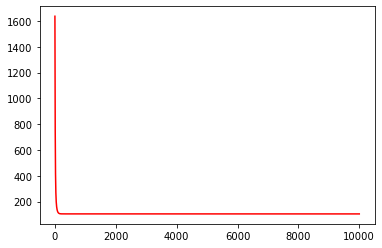

In [22]:
plt.plot(np.arange(1,10001),reg.total_loss,"r")